In [2]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
import scipy.io as scio
import pysnr


In [3]:
def My_FFT(x, Fs, win):
    N = len(x)
    index_tail = int(N/2) + 1
    x_win = x * win
    xft = fft(x_win, N)
    xft = xft[0:index_tail]
    xpsd = abs(xft)**2 * (1/(Fs*N)) * np.sqrt(np.sum(win))
    xpsd[1:-2] = 2*xpsd[1:-2]
    freq = np.arange(0, N/2+1) * Fs/N

    plt.figure()
    plt.plot(freq, 10*np.log10(xpsd))
    plt.xlim([0, Fs/2])
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Power/Frequency [dB]")
    plt.title("Periodogram Using FFT")
    plt.grid()
    plt.show()
    return freq, xpsd

def Calib_Gain(V_uncalib, Gain):
    V_calib = np.zeros(len(V_uncalib))
    for i in range(4):
        V_calib = V_calib + (V_uncalib[:,i] / Gain**(i))
        
    return V_calib

def Reading_Date(filename):
    data=scio.loadmat('./Chip1_102400_LowSpeed.mat')
    Vout_N4 = np.array(data['Vout_N4'])
    GAIN_MIN = np.array(data['GAIN_MIN'])
    GAIN_PLUS = np.array(data['GAIN_MIN'])
    GAIN = np.mean([GAIN_MIN, GAIN_PLUS])
    return Vout_N4, GAIN

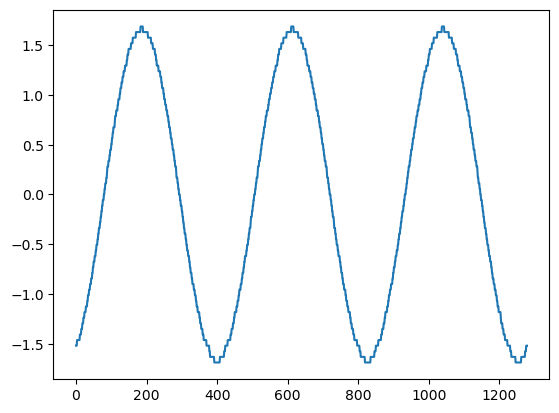

In [4]:
fs = 2E6
N_Sample = 102400
M = 1280
J = 3
Vref = 1.8
Vout_N4, Gain = Reading_Date('./Chip1_102400_LowSpeed.mat')

plt.figure()
plt.plot(Vout_N4[0:M-1,0])
plt.show()


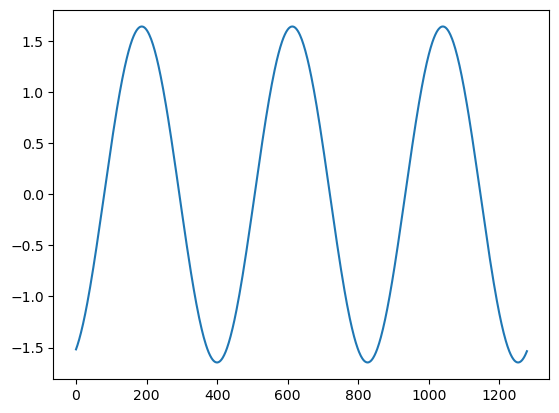

In [5]:
Vout_calib = Calib_Gain(Vout_N4, Gain)
plt.figure()
plt.plot(Vout_calib[0:M-1])
plt.show()

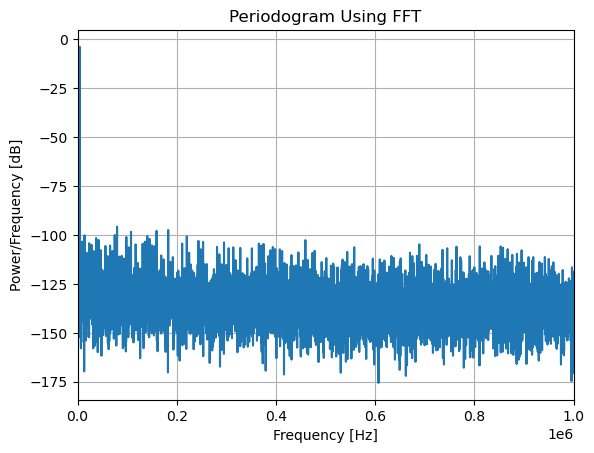

In [6]:
pff, pxx = My_FFT(Vout_calib, fs, np.kaiser(N_Sample, 38))

In [7]:
sinad_value, noise_harmonic_power = pysnr.sinad_signal(Vout_calib, fs)
thd_value, harmonic_power = pysnr.thd_signal(Vout_calib, fs, 9, True)


In [8]:
print(sinad_value)
print(thd_value)
print(Gain)


79.3385736577193
-90.51378841450688
15.316773590727465


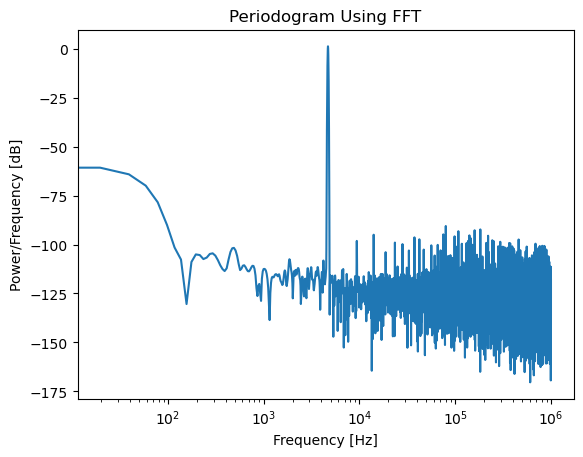

In [9]:
f, pxx = pysnr.periodogram(Vout_calib, fs, window=('kaiser', 38), scaling="spectrum")
plt.figure

plt.axes(xscale = "log") 
plt.plot(f, 10*np.log10(pxx))
plt.grid(axis ='both')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB]")
plt.title("Periodogram Using FFT")
plt.savefig('fft.pdf')
plt.grid()
plt.show()